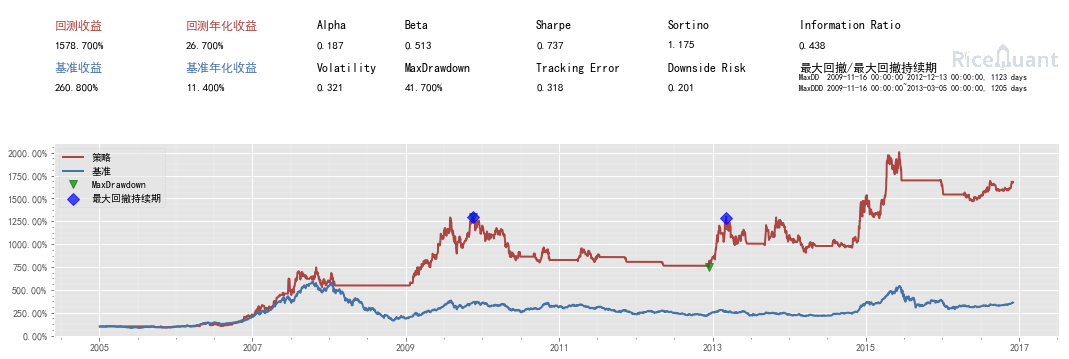

In [1]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import numpy as np
import talib as ta
import pandas as pd
import os
import rqalpha
from rqalpha.api import *

def calculate(close, period):
    mas = ta.MA(close, period)
    mal = ta.MA(close, 5*period)
    if mas[-1] > mal[-1]:
        return 1
    else:
        return 0

def init(context):
    context.s1 = "000001.XSHE"
    context.PERIOD = 80
    context.MA_Statidtic = []

def statistic(close):
    count = 0
    for i in range(1, 21):
        count += calculate(close[-i*5:], i)
    return count*5

def handle_bar(context, bar_dict):
    close = history_bars(context.s1, context.PERIOD+1, '1d', 'close')
    if len(close) == context.PERIOD+1:
        MA_Statistic1 = statistic(close[:-1])
        MA_Statistic0 = statistic(close[1:])
        cur_position = context.portfolio.positions[context.s1].quantity
        shares = context.portfolio.cash/bar_dict[context.s1].close
        if MA_Statistic1>40 and MA_Statistic0<40 and cur_position>0:
            order_target_value(context.s1, 0)
        if MA_Statistic1<65 and MA_Statistic0>65 and cur_position==0:
            order_shares(context.s1, shares)

"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)

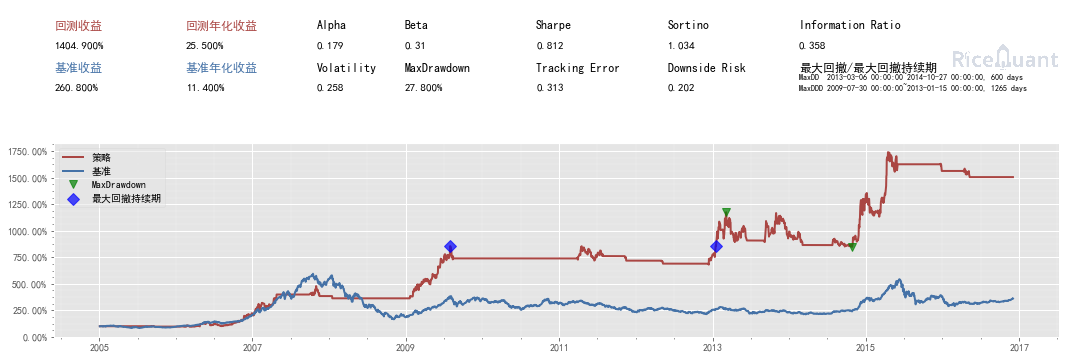

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2005-01-04  738.21      99261.79                  1.000    100000.00   
  2005-01-05  738.21     100248.56                  1.000    100986.77   
  2005-01-06  738.21      99300.17                  1.010    100038.38   
  2005-01-07  738.21      99379.96                  1.000    100118.17   
  2005-01-10  738.21     100381.88                  1.001    101120.09   
  2005-01-11  738.21     100711.14                  1.011    101449.35   
  2005-01-12  738.21     100671.75                  1.014    101409.96   
  2005-01-13  738.21     100684.88                  1.014    101423.09   
  2005-01-14  738.21      99819.31                  1.014    100557.52   
  2005-01-17  738.21      97712.45                  1.006     98450.66   
  2005-01-18  738.21      98443.69                  0.985     99181.90   

In [13]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import numpy as np
import talib as ta
import pandas as pd
import os
import rqalpha
from rqalpha.api import *

def calculate(close, period):
    mas = ta.MA(close, period)
    mal = ta.MA(close, 5*period)
    if mas[-1] > mal[-1]:
        return 1
    else:
        return 0

def init(context):
    context.s1 = "000001.XSHE"
    context.PERIOD = 80
    context.MA_Statidtic = []
    context.stoplossmultipler= 0.97 #止损 乘数
    context.takepofitmultipler= 4 #止盈 乘数

def statistic(close):
    count = 0
    for i in range(1, 21):
        count += calculate(close[-i*5:], i)
    return count*5

def handle_bar(context, bar_dict):
    stop_loss(context, bar_dict)
    entry_exit(context, bar_dict)


def entry_exit(context, bar_dict):
    close = history_bars(context.s1, context.PERIOD+1, '1d', 'close')
    if len(close) == context.PERIOD+1:
        MA_Statistic1 = statistic(close[:-1])
        MA_Statistic0 = statistic(close[1:])
        cur_position = context.portfolio.positions[context.s1].quantity
        shares = context.portfolio.cash/bar_dict[context.s1].close
        if MA_Statistic1>50 and MA_Statistic0<50 and cur_position>0:
            order_target_value(context.s1, 0)
        if MA_Statistic1<65 and MA_Statistic0>65 and cur_position==0:
            order_shares(context.s1, shares)

def stop_loss(context,bar_dict):
    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*context.stoplossmultipler:# 现价低于 原价一定比例
            order_target_percent(stock,0)
        elif bar_dict[stock].last>context.portfolio.positions[stock].avg_price*context.takepofitmultipler:# 现价高于原价一定比例
            order_target_percent(stock,0)

"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)